In [25]:
import os
import math
import torch
import random 
import torchvision
import numpy as np 
import pandas as pd 
from torch import nn
import torch.optim as optim
from torchvision import transforms
from collections import defaultdict
from tqdm.autonotebook import tqdm
from sklearn.model_selection import train_test_split
import torch.nn as nn
from torchvision.utils import make_grid as mgd

Loading the dataset


In [26]:
train_dataset = torchvision.datasets.CIFAR10(root='data/', train=True, download=True, transform = transforms.ToTensor())
test_dataset = torchvision.datasets.CIFAR10(root='data/', download=True, train=False, transform = transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [27]:
epc = 0
iter = 1
size_img = 28

dims = 3
layer1 = 32
layer2 = 64

In [28]:
configs = {'random_seed' : 42, 'val_size' : 5000, 'train_size' : 45000, 'pin_memory':True,'optimizer':'Adam','batch_size':64,'lr':0.001 }

In [29]:
torch.manual_seed(42)
my_list = [45000,5000]
train_ds, val_ds = torch.utils.data.random_split(train_dataset, my_list)

In [30]:
zer = 0
one = 1
two = 2

In [31]:
train_data = torch.utils.data.DataLoader(train_ds, configs['batch_size'], shuffle = True, pin_memory = configs['pin_memory'], num_workers = one+one)
val_data = torch.utils.data.DataLoader(val_ds, configs['batch_size'], shuffle = True, pin_memory = configs['pin_memory'], num_workers = one+one)

In [32]:
def GPU_IsAvailable():
    if torch.cuda.is_available():
        temp = torch.device('cuda')
        return temp
    else:
        tmp1 = torch.device('cpu')
        return tmp1

In [33]:
class Data_loader():
    def __init__(self, device, dl):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl: 
            variable = GPU_Calculate(b, self.device)
            yield variable

    def __len__(self):
        var = len(self.dl)
        return var

In [34]:
class Class1(nn.Module):
    
    def train_func(self, batch, num_vals):
        images, labels = batch 
        out = self(images)                  
        loss = torch.nn.functional.cross_entropy(out, labels) 
        return loss
    
    def val_func(self, batch, batch_s, num_vals):
        images, labels = batch
        batch_s = batch_s + num_vals
        out = self(images)                   
        loss = torch.nn.functional.cross_entropy(out, labels)   
        acc = calc(out, labels)        
        loss_calc = loss.detach()
        return {'val_loss': loss_calc, 'val_acc': acc}
        
    def valid_func(self, outputs, idx):
        batch_losses = list()
        batch_accs = list()
        for i in outputs:
            var6= i['val_loss']
            var7=i['val_acc']
            batch_losses.append(var6)
            batch_accs.append(var7)
        epoch_loss = torch.stack(batch_losses).mean()   
        epoch_acc = torch.stack(batch_accs).mean()      
        epochs_loss = epoch_loss.item()
        return {'val_loss': epochs_loss, 'val_acc': epoch_acc.item()}
    
    def func(self, epoch, result, idx):
        print("Epoch [{}], Training_loss: {:.5f}, Validation_loss: {:.5f}, Validation_accuracy: {:.5f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [35]:
def calc(outputs, labels):
    d1, d2 = torch.max(outputs, dim=1)
    d3 = len(d2)
    temp = torch.sum(d2 == labels).item()
    var1 = d3
    return torch.tensor(temp/var1)

In [36]:
def GPU_Calculate(data, device):
    if isinstance(data, (list,tuple)):
        ar = [y for y in data]
        tmp = [GPU_Calculate(i, device) for i in data]
        return tmp
    else:
      tmp1 = data.to(device, non_blocking=True)
      return tmp1

In [37]:
channel = 3
num = 28
@torch.no_grad()
def evaluate(model, val_loader, dt_load):
    model.eval()
    outputs = []
    for i in val_loader:
      temp = model.val_func(i, num, channel)
      outputs.append(temp)
    
    var3 = model.valid_func(outputs, num)
    return var3

def fit(epochs, lr, model, train_loader, val_loader):
    lst1 = list()
    lst2 = list()
    opt_func = optim.Adam
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        lst3 = []
        # Training Phase 
        model.train()
        for batch in train_loader:
            loss = model.train_func(batch, num)
            lst3.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader, epc)
        result['train_loss'] = torch.stack(lst3).mean().item()
        model.func(epoch, result, channel)
        lst1.append(result)
    return lst1

Ques-1

Part1 Conv->Pool->Conv->Pool->Conv->Pool

In [38]:
two = 2
one=1
class CnnModel1_2(Class1):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(dims, 32, kernel_size=dims, stride=one, padding=one),
            nn.ReLU(),
            nn.MaxPool2d(two, two),

            nn.Conv2d(32, 64, kernel_size=dims, stride=one, padding=one),
            nn.ReLU(),
            nn.MaxPool2d(two, two), 

            nn.Conv2d(64, 128, kernel_size=dims, stride=one, padding=one),
            nn.ReLU(),
            nn.MaxPool2d(two, two),

            nn.Flatten(), 
            nn.Linear(4*4*128, 10))
        
    def forward(self,x):
      x = self.network(x)
      return x

In [39]:
two = 2
four =4
one=1
class CnnModel1_4(Class1):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(dims, 32, kernel_size=dims, stride=one, padding=one),
            nn.ReLU(),
            nn.MaxPool2d(four,four),

            nn.Conv2d(32, 64, kernel_size=dims, stride=one, padding=one),
            nn.ReLU(),
            nn.MaxPool2d(two, two), 

            nn.Conv2d(64, 128, kernel_size=dims, stride=one, padding=one),
            nn.ReLU(),
            nn.MaxPool2d(two, two),

            nn.Flatten(), 
            nn.Linear(2*2*128, 10))
        
    def forward(self,x):
      x = self.network(x)
      return x

CNN MODEL 1_2

In [40]:
model1_2 = CnnModel1_2()

In [41]:
train_data1_2 = Data_loader(GPU_IsAvailable(), train_data)
val_data1_2 = Data_loader(GPU_IsAvailable(), val_data)
GPU_Calculate(model1_2, GPU_IsAvailable())

CnnModel1_2(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=2048, out_features=10, bias=True)
  )
)

In [42]:
# Training on 20 Epochs
num_epochs = 20
lr = configs['lr']
history = fit(num_epochs, lr, model1_2, train_data1_2, val_data1_2)

Epoch [0], Training_loss: 1.52832, Validation_loss: 1.28186, Validation_accuracy: 0.54371
Epoch [1], Training_loss: 1.13929, Validation_loss: 1.05653, Validation_accuracy: 0.62955
Epoch [2], Training_loss: 0.97536, Validation_loss: 0.92289, Validation_accuracy: 0.67544
Epoch [3], Training_loss: 0.87015, Validation_loss: 0.90130, Validation_accuracy: 0.68295
Epoch [4], Training_loss: 0.79441, Validation_loss: 0.85406, Validation_accuracy: 0.71025
Epoch [5], Training_loss: 0.73143, Validation_loss: 0.82590, Validation_accuracy: 0.70570
Epoch [6], Training_loss: 0.66695, Validation_loss: 0.83552, Validation_accuracy: 0.71301
Epoch [7], Training_loss: 0.61766, Validation_loss: 0.79420, Validation_accuracy: 0.73358
Epoch [8], Training_loss: 0.57824, Validation_loss: 0.81997, Validation_accuracy: 0.71776
Epoch [9], Training_loss: 0.53421, Validation_loss: 0.80596, Validation_accuracy: 0.72369
Epoch [10], Training_loss: 0.49484, Validation_loss: 0.79746, Validation_accuracy: 0.72903
Epoch [11

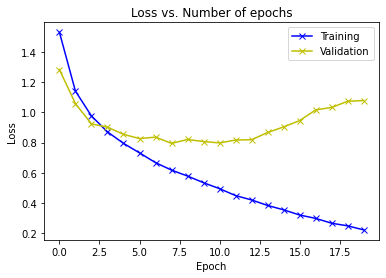

In [43]:
import matplotlib
train_losses = [x.get('train_loss') for x in history]
val_losses = [x['val_loss'] for x in history]

matplotlib.pyplot.plot(train_losses, '-bx')
matplotlib.pyplot.plot(val_losses, '-yx')
matplotlib.pyplot.xlabel('Epoch')
matplotlib.pyplot.ylabel('Loss')
matplotlib.pyplot.legend(['Training', 'Validation'])
matplotlib.pyplot.title('Loss vs. Number of epochs')

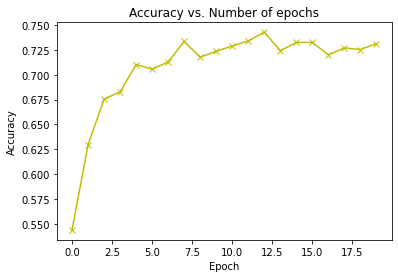

In [44]:
accuracies = [x['val_acc'] for x in history]
matplotlib.pyplot.plot(accuracies, '-yx')
matplotlib.pyplot.xlabel('Epoch')
matplotlib.pyplot.ylabel('Accuracy')
matplotlib.pyplot.title('Accuracy vs. Number of epochs');